In [12]:
import dlop_ldn_function_bases as bases
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [56]:
def mk_mod_fourier_lti(q, fac=0.9, Ninternal=1000):
    def mk_fourier_oscillator(q, mul=1.0):
        B = (np.arange(0, q) + 1) % 2
        A = np.zeros((q, q))
        for k in range(1, q):
            ki = (k + 1) // 2
            fk = 2.0 * np.pi * mul * ki
            A[2 * ki - 1, 2 * ki - 1] = 0
            A[2 * ki - 1, 2 * ki + 0] = fk
            A[2 * ki + 0, 2 * ki - 1] = -fk
            A[2 * ki + 0, 2 * ki + 0] = 0
        return A, B

    assert q % 2 == 1

    A, B = mk_fourier_oscillator(q, mul=fac)
    Ad, Bd = np.zeros((q, q)), np.zeros((q, ))

    Ad[1:, 1:], Bd[1:] = bases.discretize_lti(1.0 / Ninternal, A[1:, 1:],
                                              B[1:])
    Bd[0] = 1e-3
    Ad[0, 0] = 1.0

    H = bases.mk_lti_basis(Ad,
                           Bd,
                           Ninternal,
                           from_discrete_lti=True,
                           normalize=False)
    enc = H[:, 0]
    dec = np.linalg.pinv(H, rcond=1e-2)[0]

    Ad = Ad - np.outer(enc, dec) @ Ad
    Bd = Bd - np.outer(enc, dec) @ Bd

    A = np.real(scipy.linalg.logm(Ad)) * Ninternal
    return A, B

In [57]:
def mk_mod_fourier_basis(q, N, Nmul=1, fac=0.9, Ninternal=1000):
    A, B = mk_mod_fourier_lti(q, fac, Ninternal)
    return bases.mk_lti_basis(A, B, N, N * Nmul)

In [58]:
def mk_mod_ldn_basis(q, N, Nmul=1):
    A, B = bases.mk_ldn_lti(q)
    return bases.mk_lti_basis(A, B, N, N * Nmul)

13.56041246847527


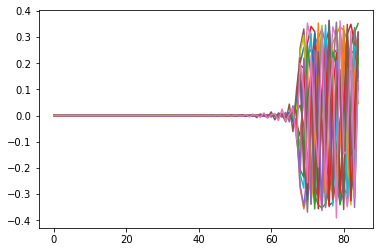

In [79]:
H = mk_mod_fourier_basis(17, 17, 5, fac=0.8)
fig, ax = plt.subplots()
ax.plot(H.T);

_, S, _ = np.linalg.svd(H)
print(np.sum(S / np.max(S)))

9.287489513420871


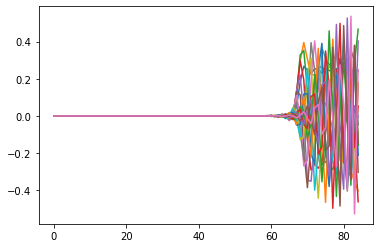

In [65]:
H = mk_mod_ldn_basis(17, 17, 5)
fig, ax = plt.subplots()
ax.plot(H.T);

_, S, _ = np.linalg.svd(H)
print(np.sum(S / np.max(S)))

13.601179342550722


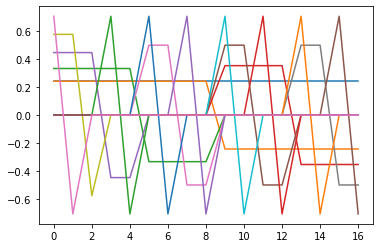

In [49]:
H = bases.mk_haar_basis(17, 17)
fig, ax = plt.subplots()
ax.plot(H.T);


_, S, _ = np.linalg.svd(H)
print(np.sum(S / np.max(S)))

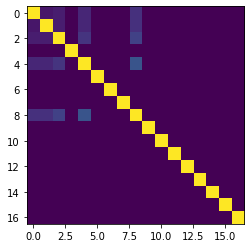

In [50]:
fig, ax = plt.subplots()
ax.imshow(H @ H.T)

In [116]:
H = np.random.uniform(-1,1, (786, 1000))

In [166]:
sigmas = []
qs = np.arange(1, 1000, 50)
for q in qs:
    H = np.random.uniform(-1,1, (786, q))
    _, S, _ = np.linalg.svd(H)
    sigmas.append(np.sum(S / np.max(S)))

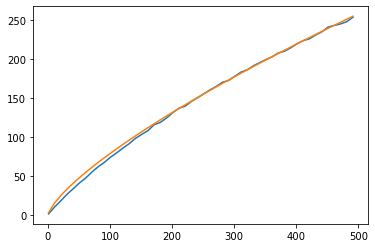

In [165]:
fig, ax = plt.subplots()
ax.plot(qs, sigmas)
ax.plot(qs, 2.6 * np.power(qs, 0.74))